In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import *

In [71]:
plotting_path = "/data/user/tvaneede/GlobalFit/analysis/study_inputs/output/flux_models"

In [72]:
def powerlaw( energy, gamma, norm ):
    # fixed at 100 TeV, inputs are GeV

    # return E^2 dPhi/dEdtdAdOmega
    return norm*(energy/1e5)**(2-gamma)

def powerlaw_cutoff( energy, gamma, norm, cutoff ):

    return norm*(energy/1e5)**(2-gamma)*np.exp(-energy/cutoff)

# def broken_powerlaw( energy, e_break, gamma_1, gamma_2 ):


def bump( energy, bump_energy, bump_norm, alpha ):

    # from paper
    exponent = (-alpha*(np.log(energy/bump_energy))**2)
    return (bump_energy)**2 * bump_norm * np.exp( exponent )



In [32]:
log_energies = np.linspace(2,10,41)
energies = 10**log_energies

flux_powerlaw = powerlaw( energies, 2.5, 1)
flux_powerlaw_cutoff = powerlaw_cutoff( energies, 2.5, 1, 3e6)

log_energies_bump = np.linspace(5,9,101)
energies_bump = 10**log_energies_bump

flux_bump = bump( energies_bump, 1e7, 1, 5)



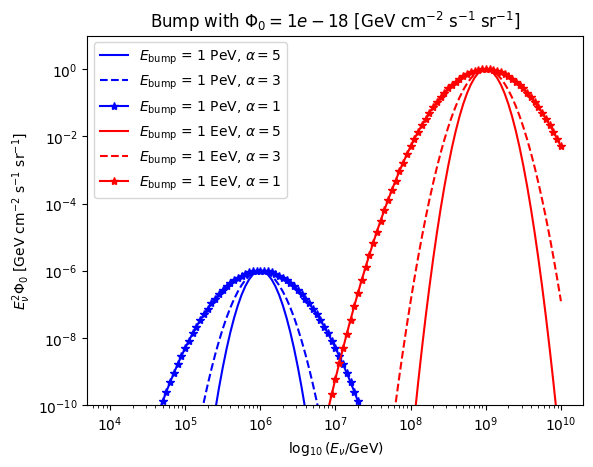

In [77]:
# study bump
log_energies_bump = np.linspace(4,10,121)
energies_bump = 10**log_energies_bump

bump_norm = 1e-18

# plotting
fig, (ax) = plt.subplots(1, 1)

ax.plot( energies_bump, bump( energy = energies_bump, bump_energy = 1e6, bump_norm = bump_norm, alpha = 5), 
         "-", label = r"$E_{\rm bump}$ = 1 PeV, $\alpha = 5$", color = "blue" )
ax.plot( energies_bump, bump( energy = energies_bump, bump_energy = 1e6, bump_norm = bump_norm, alpha = 3), 
         "--", label = r"$E_{\rm bump}$ = 1 PeV, $\alpha = 3$", color = "blue" )
ax.plot( energies_bump, bump( energy = energies_bump, bump_energy = 1e6, bump_norm = bump_norm, alpha = 1), 
         "-*", label = r"$E_{\rm bump}$ = 1 PeV, $\alpha = 1$", color = "blue" )

ax.plot( energies_bump, bump( energy = energies_bump, bump_energy = 1e9, bump_norm = bump_norm, alpha = 5), 
         "-", label = r"$E_{\rm bump}$ = 1 EeV, $\alpha = 5$", color = "red" )
ax.plot( energies_bump, bump( energy = energies_bump, bump_energy = 1e9, bump_norm = bump_norm, alpha = 3), 
         "--", label = r"$E_{\rm bump}$ = 1 EeV, $\alpha = 3$", color = "red" )
ax.plot( energies_bump, bump( energy = energies_bump, bump_energy = 1e9, bump_norm = bump_norm, alpha = 1), 
         "-*", label = r"$E_{\rm bump}$ = 1 EeV, $\alpha = 1$", color = "red" )


ax.set_xlabel(r"$\log_{10}(E_{\nu}/\rm GeV)$")
ax.set_ylabel(r"$E_{\nu}^2 \Phi_0$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]")

ax.set_title(r"Bump with $\Phi_0 = 1e-18$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$]")

ax.set_yscale("log")
ax.set_xscale("log")

ax.set_ylim( [ 1e-10,1e1 ])

ax.legend(ncol=1)

plt.savefig(f"{plotting_path}/compare_bump.pdf")

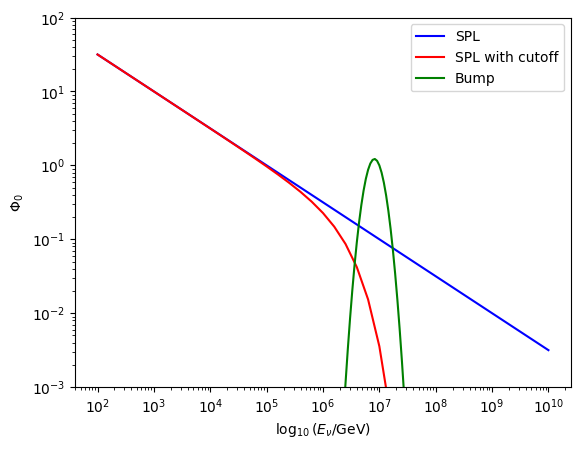

In [35]:
# plotting
fig, (ax) = plt.subplots(1, 1)

ax.plot( energies, flux_powerlaw, label = "SPL", color = "blue" )
ax.plot( energies, flux_powerlaw_cutoff, label = "SPL with cutoff", color = "red" )
ax.plot( energies_bump, flux_bump, label = "Bump", color = "green" )

# ax.axhline(1.0, color="red", linestyle="--", label="dllh = 1.0")
# ax.axvline(bestfit, color="green", linestyle="--", label=f"Bestfit {bestfit:.2f}")

ax.set_xlabel(r"$\log_{10}(E_{\nu}/\rm GeV)$")
ax.set_ylabel(r"$\Phi_0$")

# ax.set_title(name)

ax.set_yscale("log")
ax.set_xscale("log")

ax.set_ylim( [ 1e-3,1e2 ])

ax.legend()

# plt.savefig(f"{plotting_path}/dllh_name-{name}_parameter-{parameter}.pdf")

